In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("AirQuality.csv", sep=';', decimal=',')  # Adjust path & delimiter if needed


In [5]:
# Drop last two unnamed columns (often empty)
df.dropna(axis=1, how='all', inplace=True)

In [7]:
# Replace invalid values and convert types
df.replace(-200, pd.NA, inplace=True)  # In UCI dataset, -200 means missing
df = df.dropna().reset_index(drop=True)

In [9]:
# Convert necessary columns to float
numeric_cols = df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    try:
        df[col] = df[col].str.replace(',', '.').astype(float)
    except:
        continue

C:\Users\chaud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


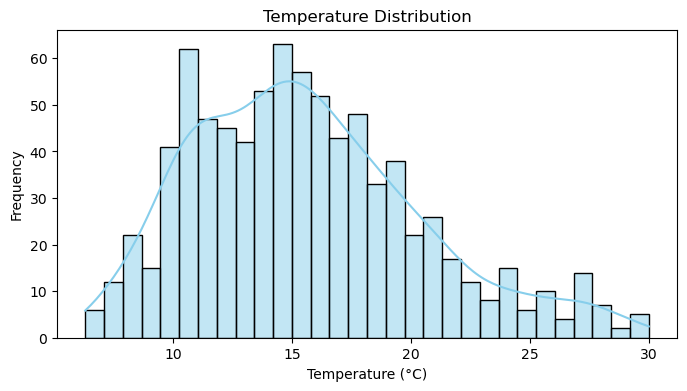

In [11]:
# 1. Temperature Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['T'], bins=30, kde=True, color='skyblue')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

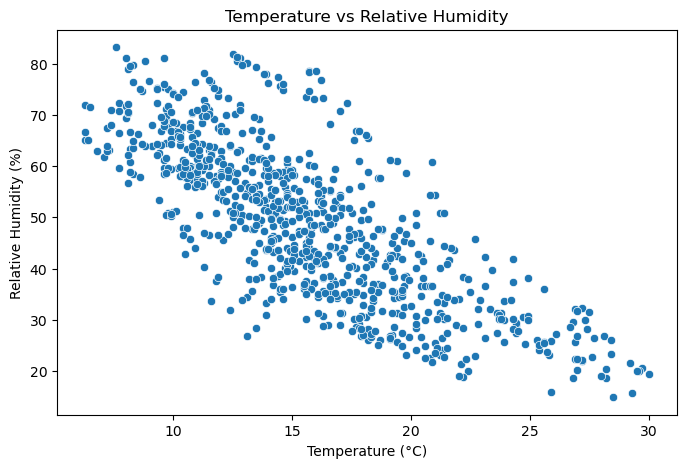

In [13]:
# 2. Scatter Plot: Temperature vs Relative Humidity
plt.figure(figsize=(8, 5))
sns.scatterplot(x='T', y='RH', data=df)
plt.title("Temperature vs Relative Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.show()

In [27]:
# 4. Correlation Heatmap
# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Drop columns with all NaN values
numeric_df = numeric_df.dropna(axis=1, how='all')
 
# Drop rows with any NaN (optional, depending on your data)
numeric_df = numeric_df.dropna()

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

No numeric columns available for correlation heatmap.


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>